# Exploring overfitting

### Imports

In [26]:
import numpy as np

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn.linear_model import LinearRegression

### Settings

In [73]:
# number of samples in the data set
N_SAMPLES = 1000
# ratio between training and test sets
TEST_SIZE = 0.1
# boundary of the graph
GRID_X_START = -2
GRID_X_END = 3
GRID_Y_START = -1.5
GRID_Y_END = 2

### Definition of grid boundaries

In [74]:
grid = np.mgrid[GRID_X_START:GRID_X_END:100j,GRID_X_START:GRID_Y_END:100j]
grid_2d = grid.reshape(2, -1).T
X_grid, Y_grid = grid

### Create artificial dataset

In [75]:
X, y = make_moons(n_samples = N_SAMPLES, noise=0.3, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state=42)

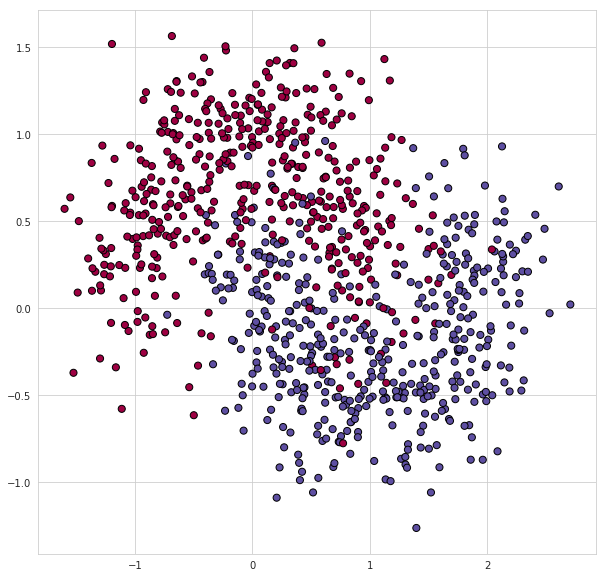

In [76]:
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train.ravel(), s=50, cmap=plt.cm.Spectral, edgecolors='black');
# plt.savefig("dataset.png")

### Linear regression

In [77]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
lr_y_pred = regressor.predict(X_test)

(10000,)


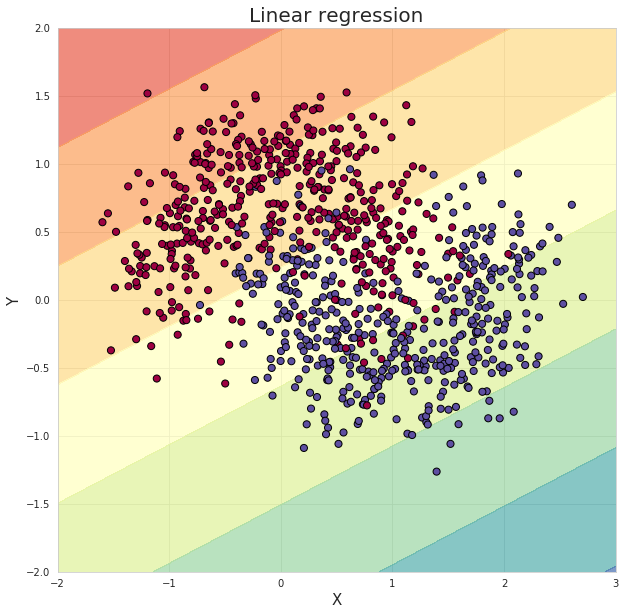

In [78]:
prediction_probs = regressor.predict(grid_2d)
print(prediction_probs.shape)
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
plt.title('Linear regression', fontsize=20)
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.contourf(X_grid, Y_grid, prediction_probs.reshape(100, 100), alpha = 0.7, cmap=cm.Spectral)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train.ravel(), s=50, cmap=plt.cm.Spectral, edgecolors='black')
# plt.savefig("./" + OUTPUT_DIR + "/keras" + makeIndexOfLength(epoch, 3) + ".png")
# plt.close()